Data Visualization and Exploration
CPSC 5530
CRN 21428
Hunter Harris: zgt795
Assignment 4: Network & Tree Visualization 1

Import Libraries

In [332]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Read Data

In [333]:
# https://www.kaggle.com/datasets/prasertk/sunshine-duration-by-city
sunshine = pd.read_csv("sunshine_hours_by_city.csv")

Inspect Data

In [334]:
print(sunshine.shape)
print(sunshine.info())

(382, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  382 non-null    object 
 1   City     382 non-null    object 
 2   Jan      382 non-null    float64
 3   Feb      382 non-null    float64
 4   Mar      382 non-null    float64
 5   Apr      382 non-null    float64
 6   May      382 non-null    float64
 7   Jun      382 non-null    float64
 8   Jul      382 non-null    float64
 9   Aug      382 non-null    float64
 10  Sep      382 non-null    float64
 11  Oct      382 non-null    float64
 12  Nov      382 non-null    float64
 13  Dec      382 non-null    float64
 14  Year     382 non-null    float64
dtypes: float64(13), object(2)
memory usage: 44.9+ KB
None


Data Cleaning

In [335]:
# Remove all cities except the first city encountered for each country.
sunshine.drop_duplicates(subset="Country", inplace=True)
sunshine.reset_index(inplace=True, drop=True)

# Randomly remove cities
np.random.seed(25)
sunshine = sunshine.drop(np.random.choice(sunshine.index, 120, replace=False))

# Create a new column containing City and Country
sunshine['City, Country'] = sunshine['City'] + ", " + sunshine['Country']

# Remove Country and City columns
sunshine.drop(columns=["Country", "City", "Year"], inplace=True)
sunshine.set_index('City, Country', inplace=True)

Visualization

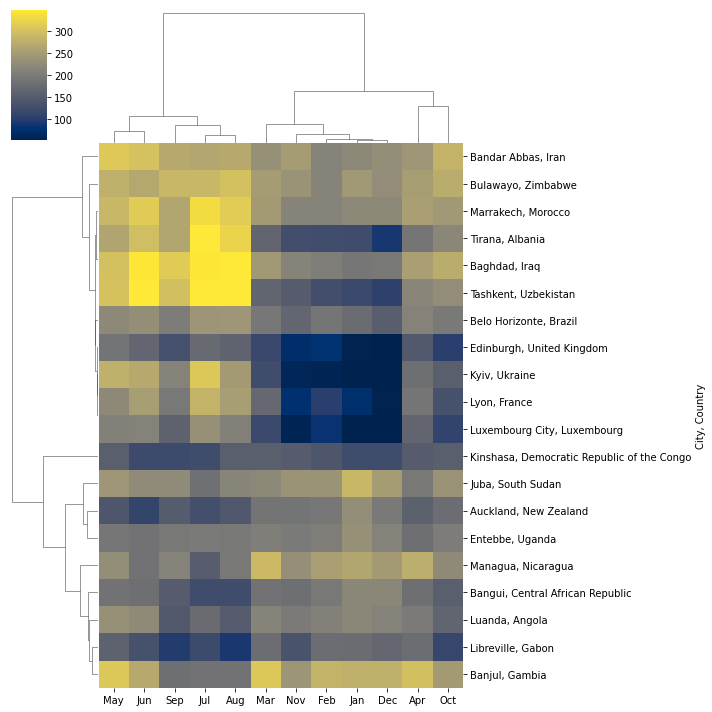

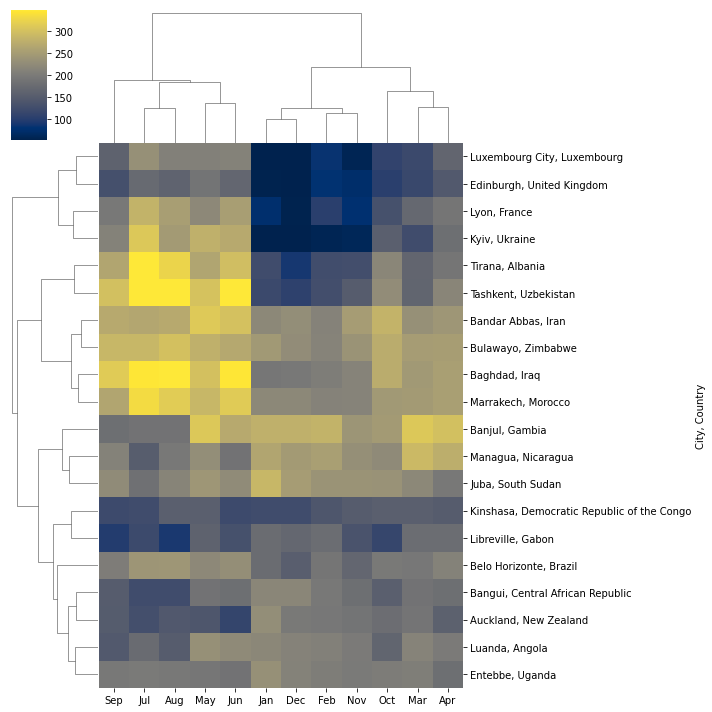

In [336]:
# Plot heatmap with clustering by dendrogram
# Correlation
sns.clustermap(sunshine, metric="correlation", robust=True, cmap="cividis")
plt.savefig("City_Sunshine_Correlation", dpi=1200, bbox_inches = 'tight')
plt.show()

# Euclidean
sns.clustermap(sunshine, metric="euclidean", robust=True, cmap="cividis")
plt.savefig("City_Sunshine_Euclidean", dpi=1200, bbox_inches = 'tight')
plt.show()